## Lyrics Sentiment & Topic Analysis

This notebook applies sentiment and topic analysis to Eurovision song lyrics that are either originally in English or have been translated to English.

**Sentiment analysis** is performed using the `Distilbert-base-uncased-emotion` model : https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+feel+a+bit+let+down

**Topic modelling** is performed via LDA (Latent Dirichlet Allocation) Topic Modeling using a Gensim corpus: https://radimrehurek.com/gensim/models/ldamodel.html

#### 1. Load data

In [1]:
import pandas as pd
df = pd.read_csv('eng_lyrics_all.csv')
print(df.shape)
df.head()

(683, 11)


,idx,year,sf_num,to_country,performer,song,lyrics,lyrics_eng_translation,lyrics_all_english,lyrics_english,lyrics_english_mix
0,0.0,2008.0,1.0,Russia,Dima Bilan,Believe,Even when the thunder and storm begins\nI'll b...,NaN,Even when the thunder and storm begins\nI'll b...,1,0
1,1.0,2008.0,2.0,Ukraine,Ani Lorak,Shady Lady,You've been my superstar\nBut it's not what yo...,NaN,You've been my superstar\nBut it's not what yo...,1,0
2,2.0,2008.0,1.0,Greece,Kalomira,Secret Combination,Can you see it?\nCan you see it you have to di...,NaN,Can you see it?\nCan you see it you have to di...,1,0
3,3.0,2008.0,1.0,Armenia,Sirusho,"Qele, Qele",Yes im hay hoghits\nEka berem\nHove sareri\nLu...,From my Armenian soil I came to bring The wind...,From my Armenian soil I came to bring The wind...,0,1
4,4.0,2008.0,1.0,Norway,Maria,Hold On Be Strong,"Love can be hard sometimes\nYes, it can catch ...",NaN,"Love can be hard sometimes\nYes, it can catch ...",1,0


#### 2. Text pre-processing
With models like `distilbert-base-uncased-emotion`, there is no need to do heavy preprocessing.

However, light cleaning can help improve consistency and reduce noise.

In [2]:
import re

def clean_text(text):
    text = str(text).strip()
    text = text.replace('\n', ' ')                # remove or replace newline characters
    text = text.replace('\\n', ' ')                # remove or replace newline characters
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text)     # remove extra whitespace
    return text

df['lyrics_all_english_clean'] = df['lyrics_all_english'].apply(clean_text)


In [3]:
print(df['lyrics_all_english_clean'][400])

We're so alike, yet different At a loss for words, stuttering It don't make sense, what's happening I just don't understand What's this fight all for? What's the cost of life in this world? Almost impossible Is to let the love unite us all Does anybody care, I'm weak and I'm afraid Wondering if I will make it through this day For the life of me I refuse to be anything but free But I'm tired of all the battling, oh… What's this fight all for? What's the cost of life in this world? All I ever really want Is to let the love unite us all Let the love unite us all Let the love unite us all What's this fight all for? What's the cost of life in this world? All I ever really want Is to let the love unite us all What's this fight all for? What's the cost of life in this world? All I ever really want Is to let the love unite us all


#### 2. Sentiment analysis
Model set up


In [4]:
pip install transformers torch

In [6]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached numpy-2.2.5-

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True, truncation=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
from tqdm.notebook import tqdm

# Apply tqdm to the iterator
results = []
for text in tqdm(df['lyrics_all_english_clean'], desc="Processing lyrics"):
    scores = classifier(text)[0]
    result_series = pd.Series({item['label']: item['score'] for item in scores})
    results.append(result_series)

# Combine results into a DataFrame and join
scores_df = pd.DataFrame(results)
df = df.join(scores_df)


Processing lyrics:   0%|          | 0/683 [00:00<?, ?it/s]

In [6]:
df

,idx,year,sf_num,to_country,performer,song,lyrics,lyrics_eng_translation,lyrics_all_english,lyrics_english,lyrics_english_mix,lyrics_all_english_clean,sadness,joy,love,anger,fear,surprise
0,0.0,2008.0,1.0,Russia,Dima Bilan,Believe,Even when the thunder and storm begins\nI'll b...,NaN,Even when the thunder and storm begins\nI'll b...,1,0,Even when the thunder and storm begins I'll be...,0.351302,0.447219,0.002866,0.135042,0.061230,0.002340
1,1.0,2008.0,2.0,Ukraine,Ani Lorak,Shady Lady,You've been my superstar\nBut it's not what yo...,NaN,You've been my superstar\nBut it's not what yo...,1,0,You've been my superstar But it's not what you...,0.059972,0.152771,0.018744,0.702110,0.064464,0.001939
2,2.0,2008.0,1.0,Greece,Kalomira,Secret Combination,Can you see it?\nCan you see it you have to di...,NaN,Can you see it?\nCan you see it you have to di...,1,0,Can you see it? Can you see it you have to dis...,0.010904,0.853131,0.003147,0.098605,0.031843,0.002370
3,3.0,2008.0,1.0,Armenia,Sirusho,"Qele, Qele",Yes im hay hoghits\nEka berem\nHove sareri\nLu...,From my Armenian soil I came to bring The wind...,From my Armenian soil I came to bring The wind...,0,1,From my Armenian soil I came to bring The wind...,0.029784,0.263041,0.010574,0.627098,0.067265,0.002237
4,4.0,2008.0,1.0,Norway,Maria,Hold On Be Strong,"Love can be hard sometimes\nYes, it can catch ...",NaN,"Love can be hard sometimes\nYes, it can catch ...",1,0,"Love can be hard sometimes Yes, it can catch y...",0.994473,0.002267,0.000645,0.002108,0.000387,0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,NaN,NaN,NaN,Spain,Melody,Esa diva,"""Desde que era bien pequeña Antes de saber and...",Since I was very little Before learning how to...,Since I was very little Before learning how to...,0,0,Since I was very little Before learning how to...,0.000411,0.998259,0.000434,0.000443,0.000249,0.000204
679,NaN,NaN,NaN,Sweden,KAJ,Bara bada bastu,"""Nåjaa\nKlockon slår, nu ere dags All bekymber...","Oh well…\nThe clock is ticking, now it's time ...","Oh well…\nThe clock is ticking, now it's time ...",0,0,"Oh well… The clock is ticking, now it's time A...",0.027033,0.741639,0.011369,0.192520,0.024919,0.002521
680,NaN,NaN,NaN,Switzerland,Zoë Më,Voyage,"""Mes yeux candides découvrent le monde D'une f...",My candid eyes discover the world In a naive w...,My candid eyes discover the world In a naive w...,0,0,My candid eyes discover the world In a naive w...,0.881401,0.100812,0.012459,0.002843,0.001595,0.000890
681,NaN,NaN,NaN,Ukraine,Ziferblat,Bird of Pray,"""Zaide-zaidesh i do mene, moia ptashka Krylamy...",You will… you'll visit me too my little birdy ...,You will… you'll visit me too my little birdy ...,0,1,You will… you'll visit me too my little birdy ...,0.795232,0.015287,0.114548,0.065145,0.008429,0.001360


#### 3. Topic Modelling

- pre-process text: remove stopwords, tokenise, lemmatise

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 3]
    return tokens

# Assuming 'df' is your DataFrame and 'lyrics' is the column with the song lyrics
df['processed_lyrics'] = df['lyrics_all_english_clean'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- create dictionary and corpus

In [26]:
from gensim import corpora

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_lyrics'])

# Filter out words that occur in less than 100 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=100, no_above=0.8)

# Create a bag-of-words representation of each document
corpus = [dictionary.doc2bow(doc) for doc in df['processed_lyrics']]

- find the optimal number of topics

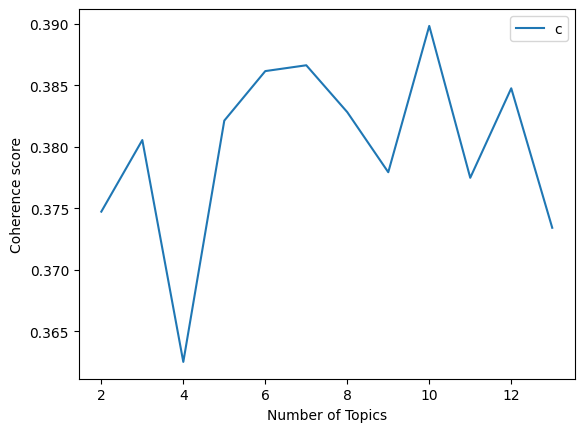

In [27]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# Function to compute coherence scores for various numbers of topics
def compute_coherence_scores(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_scores = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=42, iterations = 400)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

    return model_list, coherence_scores

# Assuming 'dictionary' and 'corpus' are already defined, and 'processed_lyrics' is the tokenized text
model_list, coherence_scores = compute_coherence_scores(dictionary=dictionary, corpus=corpus, texts=df['processed_lyrics'], start=2, limit=14, step=1)

# Plotting the coherence scores
x = range(2, 14, 1)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
from gensim.models import LdaModel

# Train the LDA model
num_topics = 2  # Adjust this according to how many topics you want to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42,iterations = 400)

In [39]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print("")

(0, '0.085*"like" + 0.084*"know" + 0.077*"time" + 0.066*"heart" + 0.055*"feel" + 0.045*"gonna" + 0.043*"give" + 0.039*"cause" + 0.037*"night" + 0.033*"light"')

(1, '0.181*"love" + 0.079*"come" + 0.064*"want" + 0.060*"take" + 0.052*"life" + 0.050*"yeah" + 0.041*"away" + 0.040*"wanna" + 0.038*"never" + 0.037*"tell"')



- visualise topic cluster

In [41]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
pyLDAvis.enable_notebook()  # If you are using a Jupyter notebook
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

- assign label to topic

In [42]:
topic_names = {
    0: 'reflection',
    1: 'love'
    # Add more mappings as needed for each topic
}

- assign topic labels to each song

In [43]:
def dominant_topic_with_names(lda_model, corpus, topic_names):
    topics = []
    for bow in corpus:
        topic_probs = lda_model.get_document_topics(bow)
        dominant_topic_index = sorted(topic_probs, key=lambda x: x[1], reverse=True)[0][0]
        # Use the topic_names mapping to get the descriptive name for the dominant topic index
        dominant_topic_name = topic_names.get(dominant_topic_index, "Unknown")  # "Unknown" is a default value
        topics.append(dominant_topic_name)
    return topics

# Apply the function with topic names to your DataFrame
df['dominant_topic'] = dominant_topic_with_names(lda_model, corpus, topic_names)

In [44]:
#save to csv file
#df.to_csv('eng_lyrics_sentiment_topic.csv')